# Prediction using Unsupervised ML

Grip Sept

Task 2

In this task I predicted the optimum number of clusters and represented it visually from the iris dataset

# **Author : Gavin Aranha**

In [34]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [23]:
# Load the iris dataset
iris_df = pd.read_csv('/content/Iris.csv')
# See the first 5 rows
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
# Drop columns that are not needed
iris_df = iris_df.drop(['Id'],axis=1)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values


from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

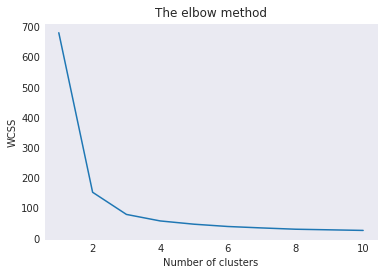

In [26]:
# Using the elbow method to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid()
plt.show()

OPTIMUM NUMBER OF CLUSTERS IS 3

# **CREATING THE KMEANS CLASSIFIER**

In [27]:
# Fitting kmeans to the dataset 
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# **PLOTING THE CLUSTERS**

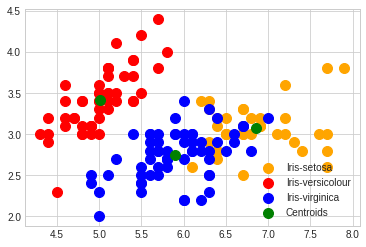

In [28]:
plt.style.use('seaborn-whitegrid')
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'green', label = 'Centroids')

plt.legend()

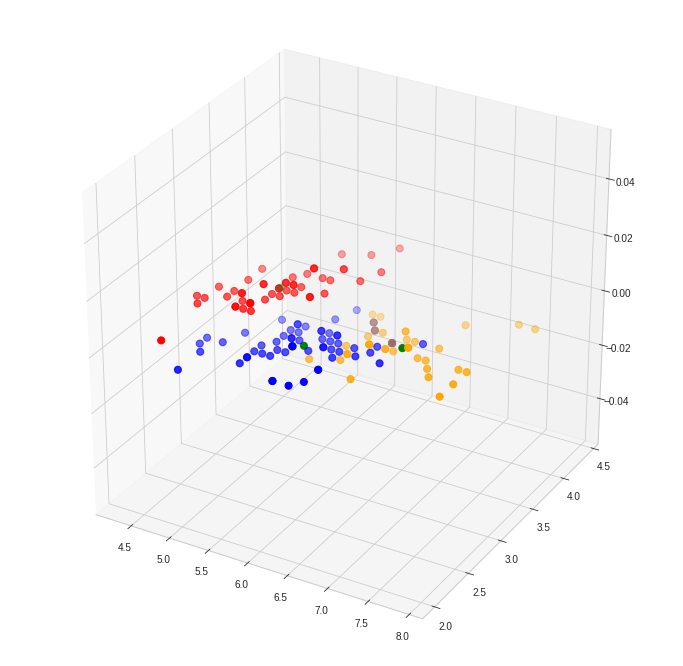

In [29]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'blue', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'green', label = 'Centroids')
plt.show()


# Labeling the **predictions**

In [ ]:
# Let's Consider
# 0  to 'Iris-setosa'
# 1 to 'Iris-versicolour'
# 2 to 'Iris-virginica'
y_kmeans = np.where(y_kmeans=='0', 'Iris-setosa', y_kmeans)
y_kmeans = np.where(y_kmeans=='1', 'Iris-versicolour', y_kmeans)
y_kmeans = np.where(y_kmeans=='2', 'Iris-virginica', y_kmeans)

# **Adding the prediction to the dataset**

In [31]:
data_with_clusters = iris_df.copy()
data_with_clusters["Cluster"] = y_kmeans
data_with_clusters.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-versicolour
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-versicolour
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-versicolour
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-versicolour
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-versicolour


# **Data Visualisation**

# **Bar plot distribution**

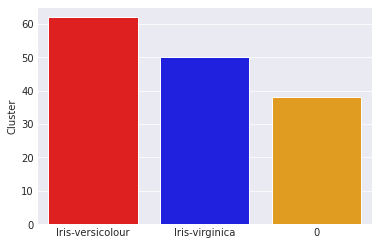

In [32]:
# Bar plot
sns.set_style('darkgrid')
sns.barplot(x = data_with_clusters["Cluster"] .unique(),
            y = data_with_clusters["Cluster"] .value_counts(),
            palette=sns.color_palette(["red", "blue", "orange"]));

# **Bar Plot Inference**

There are around 62 iris-versicolour , 50 Iris-virginica and roughly 38 Iris-setosa samples in the dataset as predicted.bold text

# **Violin plot distribution**

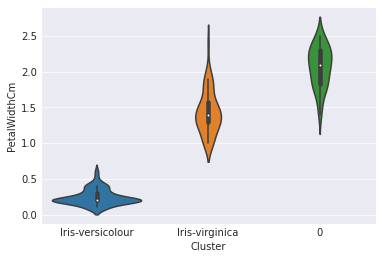

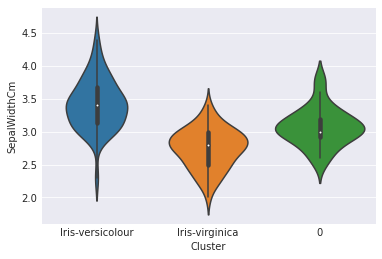

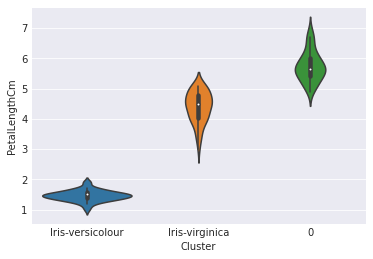

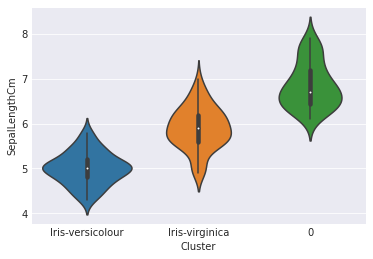

In [33]:
# violin plot
sns.violinplot(x="Cluster",y="PetalWidthCm",data=data_with_clusters)
plt.show()
sns.violinplot(x="Cluster",y="SepalWidthCm",data=data_with_clusters)
plt.show()
sns.violinplot(x="Cluster",y="PetalLengthCm",data=data_with_clusters)
plt.show()
sns.violinplot(x="Cluster",y="SepalLengthCm",data=data_with_clusters)
plt.show()


### **Thank You**